In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("../")

In [3]:
from data_processing.start_experiment import *
from data_processing.read_data import *

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
import GPy
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity
import time

In [78]:
file_name = "basic_chemotax.par"
output_file = "data_cellcount_testing.txt"

mcs = 1000
season_experiment = 1
season_duration = 1000

create_config(file_name, {'mcs': mcs,
                          'season_experiment': season_experiment,
                          'season_duration': season_duration, 
                         'keylock_list_filename': '../data/keylock/KL_l24_14_16_g6.dat',
                         'evolsim': 1,
                        'mut_rate': 0.0})

In [81]:
import asyncio

In [112]:
def run_simulation_async(identifier):
    file_name = "basic_chemotax_{}.par".format(identifier)

    mcs = 1000
    season_experiment = 1
    season_duration = 1000

    create_config(file_name, {'mcs': mcs,
                              'season_experiment': season_experiment,
                              'season_duration': season_duration, 
                             'keylock_list_filename': '../data/keylock/KL_l24_14_16_g6.dat',
                             'evolsim': 1,
                            'mut_rate': 0.0})
    
    execute_experiment(file_name,identifier)

In [113]:
identifiers_to_run = [run_simulation_async(i) for i in range(5)]

Opening ../data/parameters/basic_chemotax_0.par for reading
Opening ../data/parameters/basic_chemotax_2.par for reading
[T  = [T  = 1.600000e+01]1.600000e+01]

[target_area  = [target_area  = 50]
50]
[half_div_area  = [half_div_area  = 500]
500]
[half_div_area_2  = -1]
[half_div_area_2  = -1][target_length  = 
0]
[target_length  = [lambda  = 0]
5.000000e+00]
[lambda  = [lambda2  = 5.000000e+00]
0.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = [conn_diss  = 0]0]

[vecadherinknockout  = false][vecadherinknockout  = 
false][extensiononly  = 
false]
[extensiononly  = false]
Opening ../data/parameters/basic_chemotax_1.par for reading
[chemotaxis  = [chemotaxis  = 0]0]

[border_energy  = 100]
[border_energy  = [neighbours  = 100]
2][neighbours  = 
2]
[min_area_for_life  = [min_area_for_life  = 4]
4]
Opening ../data/parameters/basic_chemotax_3.par for reading
[key

init chemmu is1
TIME: 0
init chemmu is1
TIME: 0
init chemmu is1
TIME: 0
init chemmu is1
TIME: 0
init chemmu is1
TIME: 0
First call - inside Write(), making colors
generate color table
First call - inside Write(), making colors
generate color table
First call - inside Write(), making colors
generate color table
First call - inside Write(), making colors
generate color table
First call - inside Write(), making colors
generate color table
Time = 1000
End of season: there are 100 cells
Time = 1000
End of season: there are 100 cells
Time = 1000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 1000
End of season: there are 100 cells
Time = 1000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
After reproduction there are 150 cell

In [107]:
await asyncio.gather(*identifiers_to_run,return_exceptions=True) 

[None, None, None, None, None]

In [80]:
execute_experiment(file_name,0)

Opening ../data/parameters/basic_chemotax.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 1000]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.

Starting the dish. Initialising...


First call - inside Write(), making colors
generate color table
Time = 1000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 1000


In [10]:
all_cells = read_data("data_cellcount_testing.txt")
all_times = sorted(list(set([i.time for i in all_cells])))

In [15]:
weighted_size_over_time = [weighted_blobsize_cells(all_cells,i) for i in all_times]
num_blobs_over_time = [num_blobs_cells(all_cells,i) for i in all_times]

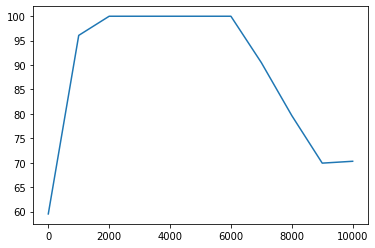

In [16]:
plt.plot(all_times,weighted_size_over_time)

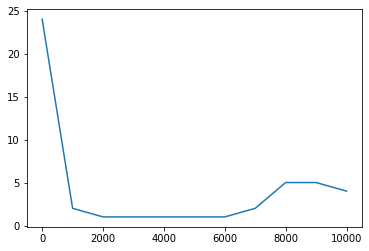

In [17]:
plt.plot(all_times,num_blobs_over_time)

In [12]:
def get_reward(X):
    rewards = np.empty(shape=[0, 1])
    file_name = "basic_chemotax2.par"
    output_file = "data_cellcount_testing.txt"
    mcs = 1000
    season_experiment = 1
    save_text_file_period = 10

    
    for i in range(X.shape[0]):
        season_duration = int(X[i,None])
        print("Season duration is {}".format(season_duration))
        create_config(file_name, {'mcs': mcs,
                          'season_experiment': season_experiment,
                          'season_duration': season_duration, 
                         'keylock_list_filename': '../data/keylock/KL_l24_14_16_g6.dat',
                        'save_text_file_period': save_text_file_period,
                         'evolsim': 1,
                        'mut_rate': 0.0})
        execute_experiment(file_name,output_file)
        
        all_cells = read_data("data_cellcount_testing.txt")
        all_times = sorted(list(set([i.time for i in all_cells])))
        
        weighted_size_over_time = [weighted_blobsize_cells(all_cells,i) for i in all_times]
        
        average_weighted_size = np.mean(weighted_size_over_time)
        
        rewards = np.vstack([rewards, average_weighted_size])
    return rewards

In [33]:
get_reward(np.array([100,200]))

Season duration is 100
Starting the dish. Initialising...


Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 100]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.

End of season: Gradient switching at time (+/- 25 MCS) = 100


Time = 300
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 200
End of season: Gradient switching at time (+/- 25 MCS) = 300


Time = 400
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 500
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 400
End of season: Gradient switching at time (+/- 25 MCS) = 500


Time = 600
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 700
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 600


Time = 800
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 700
End of season: Gradient switching at time (+/- 25 MCS) = 800


Time = 900
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 900


Time = 1000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 1000
Season duration is 200
Starting the dish. Initialising...


Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 100]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.

End of season: Gradient switching at time (+/- 25 MCS) = 200


Time = 400
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 400


Time = 600
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 600


Time = 800
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 1000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 800
End of season: Gradient switching at time (+/- 25 MCS) = 1000


array([[91.90909091],
       [88.62545455]])

In [13]:
parameter_space = ParameterSpace([DiscreteParameter('season_duration',list(range(100,1000,10)))])

In [72]:
design = LatinDesign(parameter_space) 
X = design.get_samples(3)

In [73]:
X

array([[840],
       [540],
       [250]])

In [15]:
Y = get_reward(X)
gpy_model = GPy.models.GPRegression(X, Y, GPy.kern.RBF(1, lengthscale=0.08, variance=20), noise_var=1e-10)
emukit_model = GPyModelWrapper(gpy_model)

Season duration is 320
Starting the dish. Initialising...


Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 10]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.0

Season duration is 780
Starting the dish. Initialising...


Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 10]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.0

Season duration is 230
Starting the dish. Initialising...


Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 10]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.0

NameError: name 'model_emukit' is not defined

In [16]:
emukit_model.optimize()

In [20]:
emukit_model.X, emukit_model.Y 

(ObsAr([[320.],
        [780.],
        [230.]]),
 ObsAr([[42.3429703 ],
        [45.87069307],
        [46.16316832]]))

In [21]:
X = np.array([[50]])
Y = np.array([[25]])

In [22]:
new_X = np.append(emukit_model.X, X, axis=0)
new_Y = np.append(emukit_model.Y, Y, axis=0)


In [23]:
new_X, new_Y

(array([[320.],
        [780.],
        [230.],
        [ 50.]]),
 array([[42.3429703 ],
        [45.87069307],
        [46.16316832],
        [25.        ]]))

In [24]:
emukit_model.set_data(new_X,new_Y)

In [53]:
x_plot = np.array([[320],[1000]])

In [54]:
x_plot 

array([[ 320],
       [1000]])

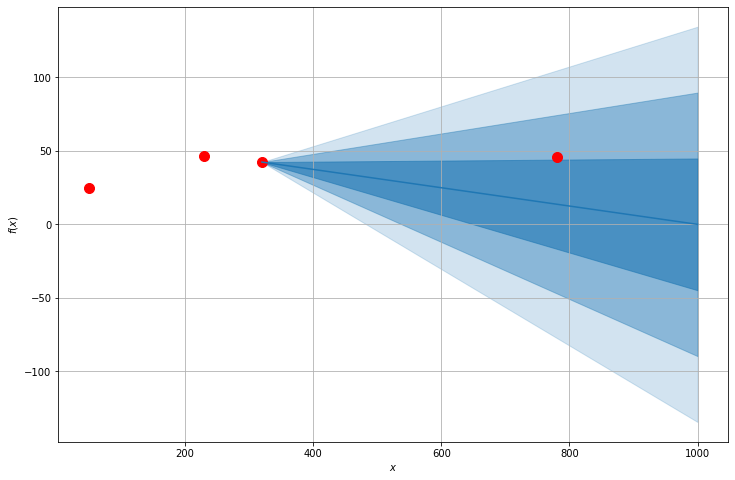

In [56]:
mu_plot, var_plot = emukit_model.predict(x_plot)

plt.figure(figsize=(12, 8))
plt.plot(emukit_model.X, emukit_model.Y, "ro", markersize=10, label="Observations")
#plt.plot(x_plot, y_plot, "k", label="Objective Function")
plt.plot(x_plot, mu_plot, "C0", label="Model")
plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], color="C0", alpha=0.6)
plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 2 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 2 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.4)
plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 3 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 3 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.2)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.grid(True)
plt.show()


In [42]:
mu_plot, var_plot

(array([[0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [6.45895469e-262],
        [2.13295317e-002],
        [1.21842543e-160],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
 

In [49]:
emukit_model.predict(np.array([[1000],[320]]))

(array([[ 0.       ],
        [42.3429703]]),
 array([[2.00612151e+03],
        [1.02001661e-08]]))

In [61]:
senstivity = MonteCarloSensitivity(model = emukit_model, input_domain = parameter_space)
main_effects, total_effects, _ = senstivity.compute_effects(num_monte_carlo_points = 10000)

In [62]:
main_effects

{'season_duration': array([1.00010365])}

In [63]:
total_effects

{'season_duration': array([1.00079718])}